In [1]:
from os import getenv

from dotenv import load_dotenv

load_dotenv()
DATA = getenv("DATA_DIRECTORY")

In [2]:
from scipy.io.wavfile import read

rate, data = read(f"{DATA}/dataset2/audio/AR_A_fret_0-20.wav")
length = data.shape[0] / rate
signal = data / data.max()

<ipython-input-2-d4e1c2c29dc4>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, data = read(f"{DATA}/dataset2/audio/AR_A_fret_0-20.wav")


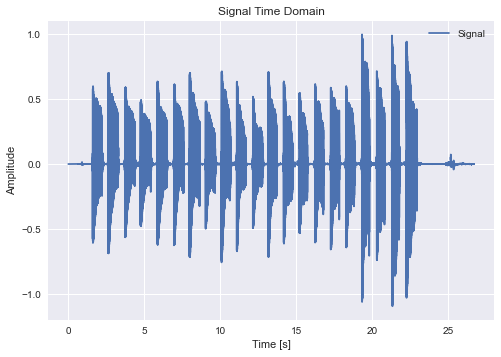

In [3]:
from numpy import linspace
from matplotlib import pyplot as plt

plt.title("Signal Time Domain")
plt.plot(linspace(0, length, data.shape[0]), signal, label="Signal")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

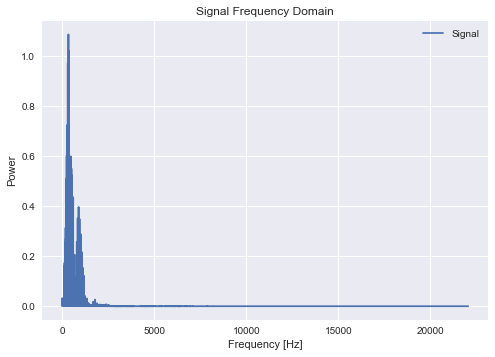

In [4]:
from scipy.fft import rfft as fft, rfftfreq as fftfreq

xf = fftfreq(round(rate * length), 1 / rate)
yf = fft(signal)

plt.title("Signal Frequency Domain")
plt.plot(xf, abs(yf / max(yf)), label="Signal")
plt.legend()
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power")
plt.show()

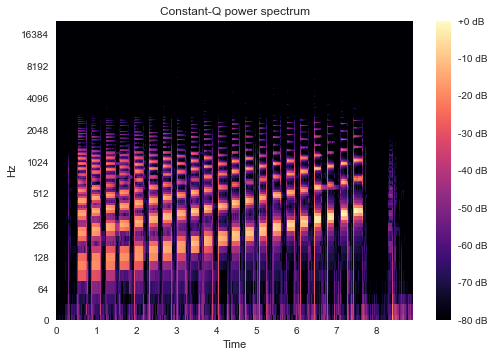

In [5]:
from scipy.signal import stft
from librosa import amplitude_to_db
from librosa.display import specshow
from numpy import max, abs

frequency_domain, time_domain, spectrum = stft(signal, fs=rate, nperseg=2048, noverlap=512)
fig, ax = plt.subplots()
img = specshow(amplitude_to_db(abs(spectrum), ref=max), sr=rate, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")